In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

# setting parameters for dataframe

pd.set_option("display.max_columns" , 1000) 
pd.set_option("display.max_rows" , 1000)  


## setting parameters for plotting
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["font.size"] = 14

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

    
# tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
#                   png_file_to_save='../../img/topic3_decision_tree1.png')

In [16]:
data = pd.read_csv(r"../Data/train.csv")

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.shape

(891, 12)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA on Sex

In [22]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
# data[""]

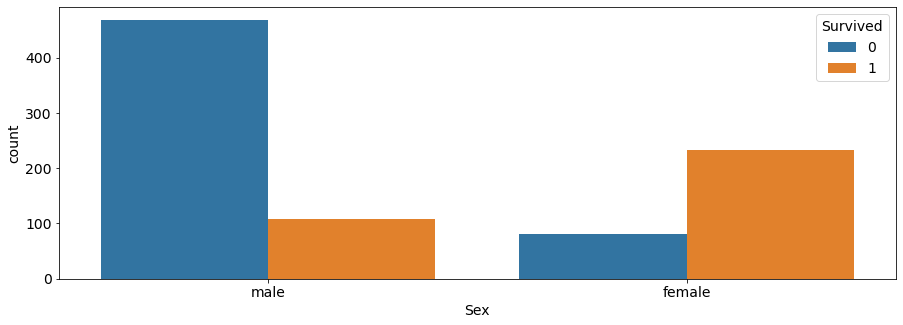

In [24]:
sns.countplot(x = "Sex" , data = data , hue = "Survived")

In [25]:
data.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

### `lets dive into those people who was male and survived`

In [26]:
data[(data["Sex"] == "male") & (data["Survived"] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C


In [27]:
# sorry for middle jump but just found an insight, wanted to check so desperately. relatoin between ticket and Pclass

In [28]:
ticket =list(map(lambda x : int(float(x.split(" ")[-1])) , data[data["Ticket"] != "LINE"]["Ticket"]))

In [29]:
ticket

[21171,
 17599,
 3101282,
 113803,
 373450,
 330877,
 17463,
 349909,
 347742,
 237736,
 9549,
 113783,
 2151,
 347082,
 350406,
 248706,
 382652,
 244373,
 345763,
 2649,
 239865,
 248698,
 330923,
 113788,
 349909,
 347077,
 2631,
 19950,
 330959,
 349216,
 17601,
 17569,
 335677,
 24579,
 17604,
 113789,
 2677,
 2152,
 345764,
 2651,
 7546,
 11668,
 349253,
 2123,
 330958,
 23567,
 370371,
 14311,
 2662,
 349237,
 3101295,
 39886,
 17572,
 2926,
 113509,
 19947,
 31026,
 2697,
 34651,
 2144,
 2669,
 113572,
 36973,
 347088,
 17605,
 2661,
 29395,
 3464,
 3101281,
 315151,
 33111,
 2144,
 14879,
 2680,
 1601,
 348123,
 349208,
 374746,
 248738,
 364516,
 345767,
 345779,
 330932,
 113059,
 14885,
 3101278,
 6608,
 392086,
 19950,
 343275,
 343276,
 347466,
 5734,
 2315,
 364500,
 374910,
 17754,
 17759,
 231919,
 244367,
 349245,
 349215,
 35281,
 7540,
 3101276,
 349207,
 343120,
 312991,
 349249,
 371110,
 110465,
 2665,
 324669,
 4136,
 2627,
 3101294,
 370369,
 11668,
 17558,
 34

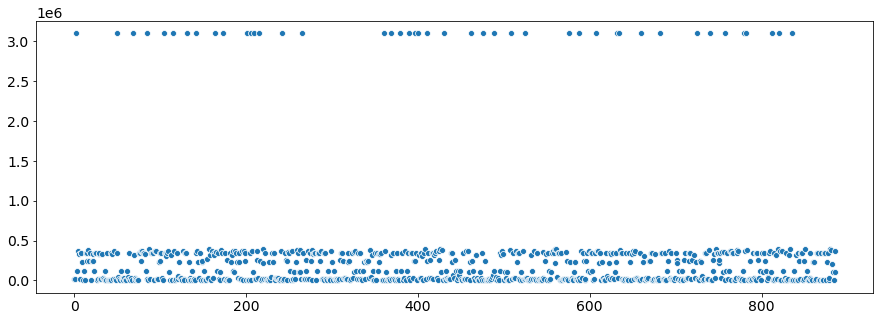

In [30]:
sns.scatterplot(x = np.arange(len(ticket)) , y = ticket)

In [31]:
# drop the column cabin and PassengerId
data.drop(["PassengerId", "Cabin"] , axis = 1 , inplace = True)

In [32]:
data.shape

(891, 10)

In [33]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

C:\Users\nihal\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nihal\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

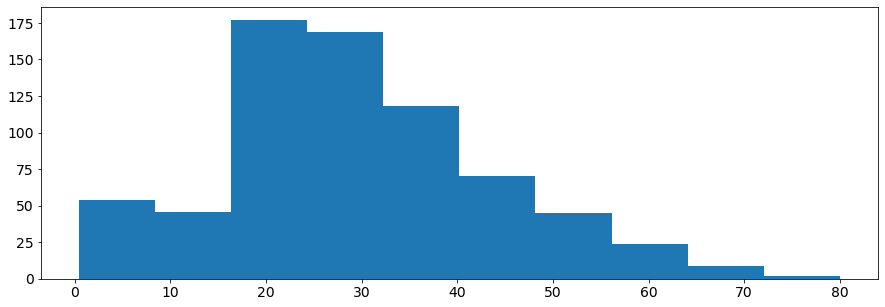

In [34]:
plt.hist(data["Age"])

In [35]:
# For now I am replacing Age by its mean we can do better then that in later version of this model


In [36]:
mean_age = data[~np.isnan(data["Age"])]["Age"].mean()

In [37]:
data["Age"].fillna(mean_age , inplace = True)

In [38]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [39]:
data["Embarked"]

0        S
1        C
2        S
3        S
4        S
5        Q
6        S
7        S
8        S
9        C
10       S
11       S
12       S
13       S
14       S
15       S
16       Q
17       S
18       S
19       C
20       S
21       S
22       Q
23       S
24       S
25       S
26       C
27       S
28       Q
29       S
30       C
31       C
32       Q
33       S
34       C
35       S
36       C
37       S
38       S
39       C
40       S
41       S
42       C
43       C
44       Q
45       S
46       Q
47       Q
48       C
49       S
50       S
51       S
52       C
53       S
54       C
55       S
56       S
57       C
58       S
59       S
60       C
61     NaN
62       S
63       S
64       C
65       C
66       S
67       S
68       S
69       S
70       S
71       S
72       S
73       C
74       S
75       S
76       S
77       S
78       S
79       S
80       S
81       S
82       Q
83       S
84       S
85       S
86       S
87       S
88       S
89       S
90       S

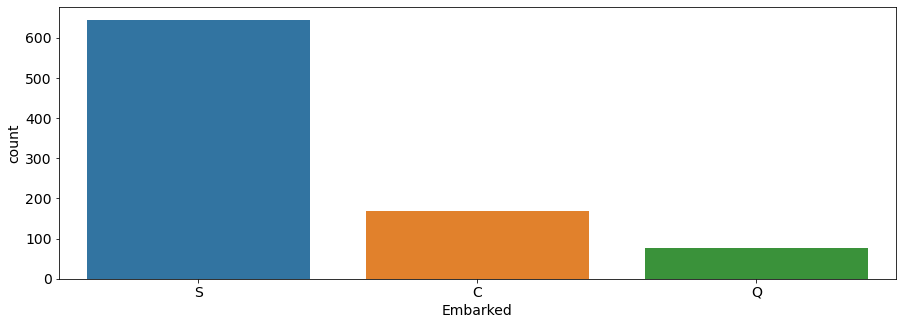

In [40]:
import seaborn as sns
sns.countplot(data["Embarked"])

In [41]:
# For replacing nan in Embarked for now we are replacing it with the "S" but we can do better in the future version.
data["Embarked"].fillna("S" , inplace =True)

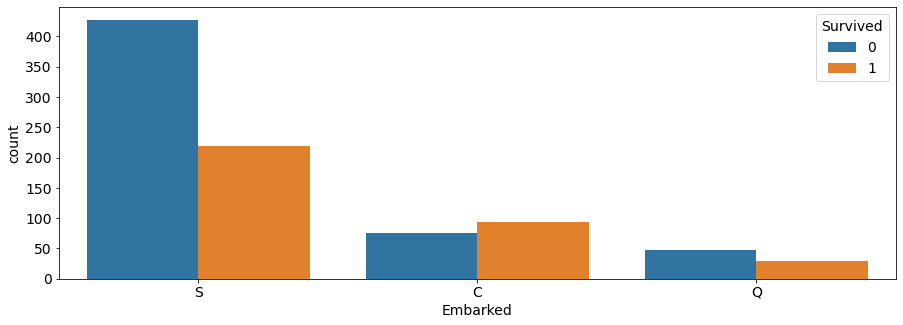

In [42]:
sns.countplot(data["Embarked"] , hue = data["Survived"])

In [43]:
data.groupby("Embarked")["Survived"].value_counts(normalize = True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

In [44]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [45]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
data["Gender"] = data["Sex"].map({"male":0, "female" : 1}, )

In [47]:
data.drop(["Sex"], axis = 1, inplace = True)

In [48]:
data["Gender"].value_counts()

0    577
1    314
Name: Gender, dtype: int64

In [49]:
# # data["Ticket"].unique()

# sns.countplot(data["Ticket"])
# plt.xticks(rotation = 45)

In [50]:
# we can see that Ticket feature is just random this is not going to help us in predicting survival.

In [51]:
X = data.drop(["Survived", "Name" , "Ticket"], axis = 1)
y  = data["Survived"]

In [52]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,22.0,1,0,7.2500,S,0
1,1,38.0,1,0,71.2833,C,1
2,3,26.0,0,0,7.9250,S,1
3,1,35.0,1,0,53.1000,S,1
4,3,35.0,0,0,8.0500,S,0


In [53]:
X["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
X["Embarked"] = X["Embarked"].map({"S" : 1, "C":2, "Q":3} )

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
y_train.name

'Survived'

In [57]:
Dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [58]:
accuracy_score(y_test , Dtree.predict(x_test))

0.753731343283582

In [59]:
f1_score(y_test, Dtree.predict(x_test))

0.676470588235294

In [60]:
precision_score(y_test ,Dtree.predict(x_test) )

0.7419354838709677

In [61]:
recall_score(y_test , Dtree.predict(x_test))

0.6216216216216216

In [62]:
export_graphviz(Dtree,
                     out_file="../Tree_graph/tree.dot",
                     feature_names = x_train.columns, 
                     class_names=y_train.name,
                     filled = True)

In [63]:
tree_graph_to_png(tree=Dtree, feature_names=x_train.columns, 
                  png_file_to_save="../Tree_graph/_basic_decision_tree_1.png")

In [64]:
## let's cut this shit we will explore later, lets go the boss of the ring.

In [65]:
from sklearn.model_selection import GridSearchCV 

tree_params = {'max_depth' : range(4, 20) , 'max_features':range(2, 6) , "min_samples_leaf":range(1, 10)}
Dtree = DecisionTreeClassifier(criterion = "entropy")

grid_tree = GridSearchCV(Dtree , tree_params , cv = 10 , verbose = True , n_jobs = -1)
grid_tree.fit(x_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:    7.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 20), 'max_features': range(2, 6),
                         'min_samples_leaf': range(1, 10)},
             verbose=True)

In [66]:
grid_tree.best_score_

0.826600102406554

In [67]:
accuracy_score(y_test , grid_tree.predict(x_test))

0.7985074626865671

In [68]:
grid_tree.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 4}

In [69]:
tree_graph_to_png(tree=grid_tree.best_estimator_, feature_names=x_train.columns, 
                  png_file_to_save="../Tree_graph/_basic_decision_tree_grid_search_v2.png")

In [70]:
precision_score(y_test ,grid_tree.predict(x_test) )

0.8518518518518519

In [71]:
recall_score(y_test ,grid_tree.predict(x_test))

0.6216216216216216

### let's rock with pclass

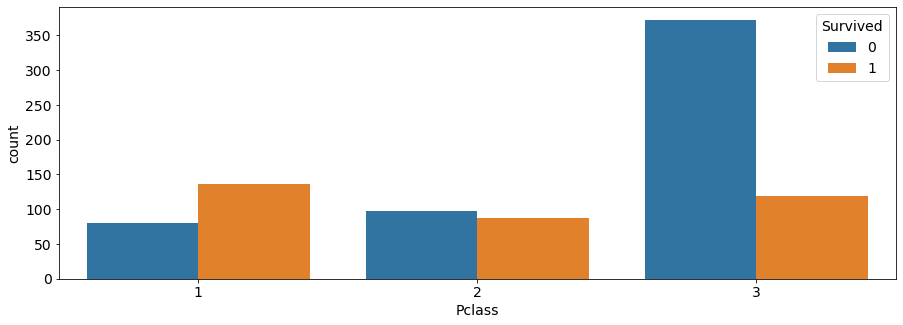

In [74]:
sns.countplot(x = "Pclass" , data = data , hue = "Survived")

In [75]:
data.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

## is there any relation between Fare and age? what do you think, lets findout together.

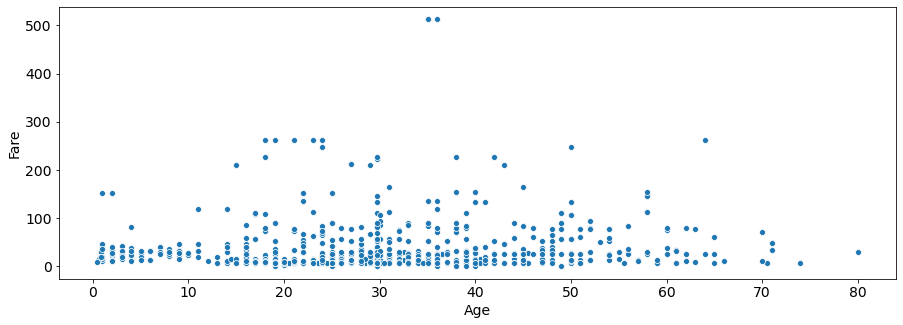

In [76]:
sns.scatterplot(x = "Age" , y ="Fare" , data = data)

In [79]:
Corr , _ = pearsonr(data["Age"] , data["Fare"])
print("Correlation between Age and Fare is ->" , Corr)

Correlation between Age and Fare is -> 0.0915660932850576


In [80]:
## no there is no correlatoin, that is just very sad .

### do you found who are these two high fare guys what are doing up there.

In [81]:
data[data["Fare"] > 400]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
258,1,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,512.3292,C,1
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",36.0,0,1,PC 17755,512.3292,C,0
737,1,1,"Lesurer, Mr. Gustave J",35.0,0,0,PC 17755,512.3292,C,0


In [82]:
data[data["Age"] > 75]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",80.0,0,0,27042,30.0,S,0
